In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import time
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        pass
#         print(os.path.join(dirname, filename))

In [6]:
images_df = pd.read_csv("../input/fashion-product-images-dataset/fashion-dataset/images.csv")

In [7]:
styles_df = pd.read_csv("../input/fashion-product-images-dataset/fashion-dataset/styles.csv", on_bad_lines='skip')

In [8]:
images_df['id'] = images_df['filename'].apply(lambda x: x.replace(".jpg","")).astype(int)

In [9]:
images_df

,filename,link,id
0,15970.jpg,http://assets.myntassets.com/v1/images/style/p...,15970
1,39386.jpg,http://assets.myntassets.com/v1/images/style/p...,39386
2,59263.jpg,http://assets.myntassets.com/v1/images/style/p...,59263
3,21379.jpg,http://assets.myntassets.com/v1/images/style/p...,21379
4,53759.jpg,http://assets.myntassets.com/v1/images/style/p...,53759
...,...,...,...
44441,17036.jpg,http://assets.myntassets.com/v1/images/style/p...,17036
44442,6461.jpg,http://assets.myntassets.com/v1/images/style/p...,6461
44443,18842.jpg,http://assets.myntassets.com/v1/images/style/p...,18842
44444,46694.jpg,http://assets.myntassets.com/v1/images/style/p...,46694


In [10]:
data = styles_df.merge(images_df,on='id',how='left').reset_index(drop=True)
data['filename'] = data['filename'].apply(lambda x: os.path.join("../input/fashion-product-images-dataset/fashion-dataset/images/",x))

In [11]:
image_files = os.listdir("../input/fashion-product-images-dataset/fashion-dataset/images")

In [12]:
data['file_found'] = data['id'].apply(lambda x: f"{x}.jpg" in image_files)

In [13]:
data = data[data['file_found']].reset_index(drop=True)

In [14]:
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,filename,link,file_found
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,../input/fashion-product-images-dataset/fashio...,http://assets.myntassets.com/v1/images/style/p...,True
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,../input/fashion-product-images-dataset/fashio...,http://assets.myntassets.com/v1/images/style/p...,True
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,../input/fashion-product-images-dataset/fashio...,http://assets.myntassets.com/v1/images/style/p...,True
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,../input/fashion-product-images-dataset/fashio...,http://assets.myntassets.com/v1/images/style/p...,True
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,../input/fashion-product-images-dataset/fashio...,http://assets.myntassets.com/v1/images/style/p...,True


The following will be analysed:
1. 3 random images to visualize the images in the dataset
2. number of products per category
3. number of products per sub-category
4. number of products per article type
5. number of products by gender
6. Sizes of images in the dataset

In [15]:
def read_img(image_path):
    image = load_img(image_path,target_size=(256,256,3))
    image = img_to_array(image)
    image = image/255.
    return image 


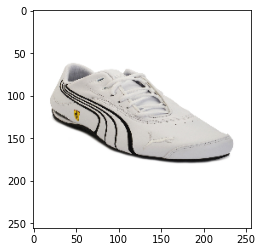

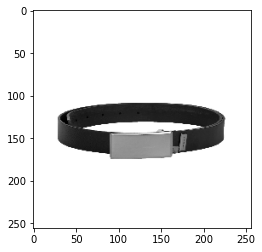

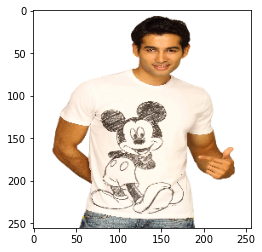

In [16]:
import random
c=0
while c!=3:
    i = random.randint(1,len(data))
    img1 = read_img(data.loc[i,'filename'])
    plt.figure(figsize=(4,4))
    plt.imshow(img1)
    c+= 1
    

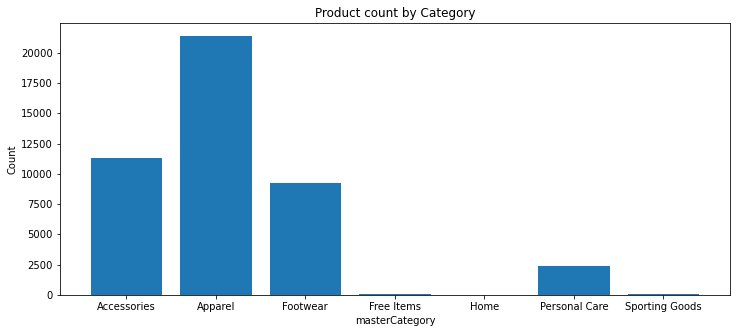

In [18]:
x_axis = data.groupby('masterCategory').count().reset_index()
h = list(x_axis['id'])
fig = plt.figure(figsize = (12, 5))
# h = max([data.groupby('masterCategory').count().reset_index()])
plt.bar(list(x_axis['masterCategory']), h)
plt.xlabel('masterCategory')
plt.ylabel("Count")
plt.title("Product count by Category")
plt.show()

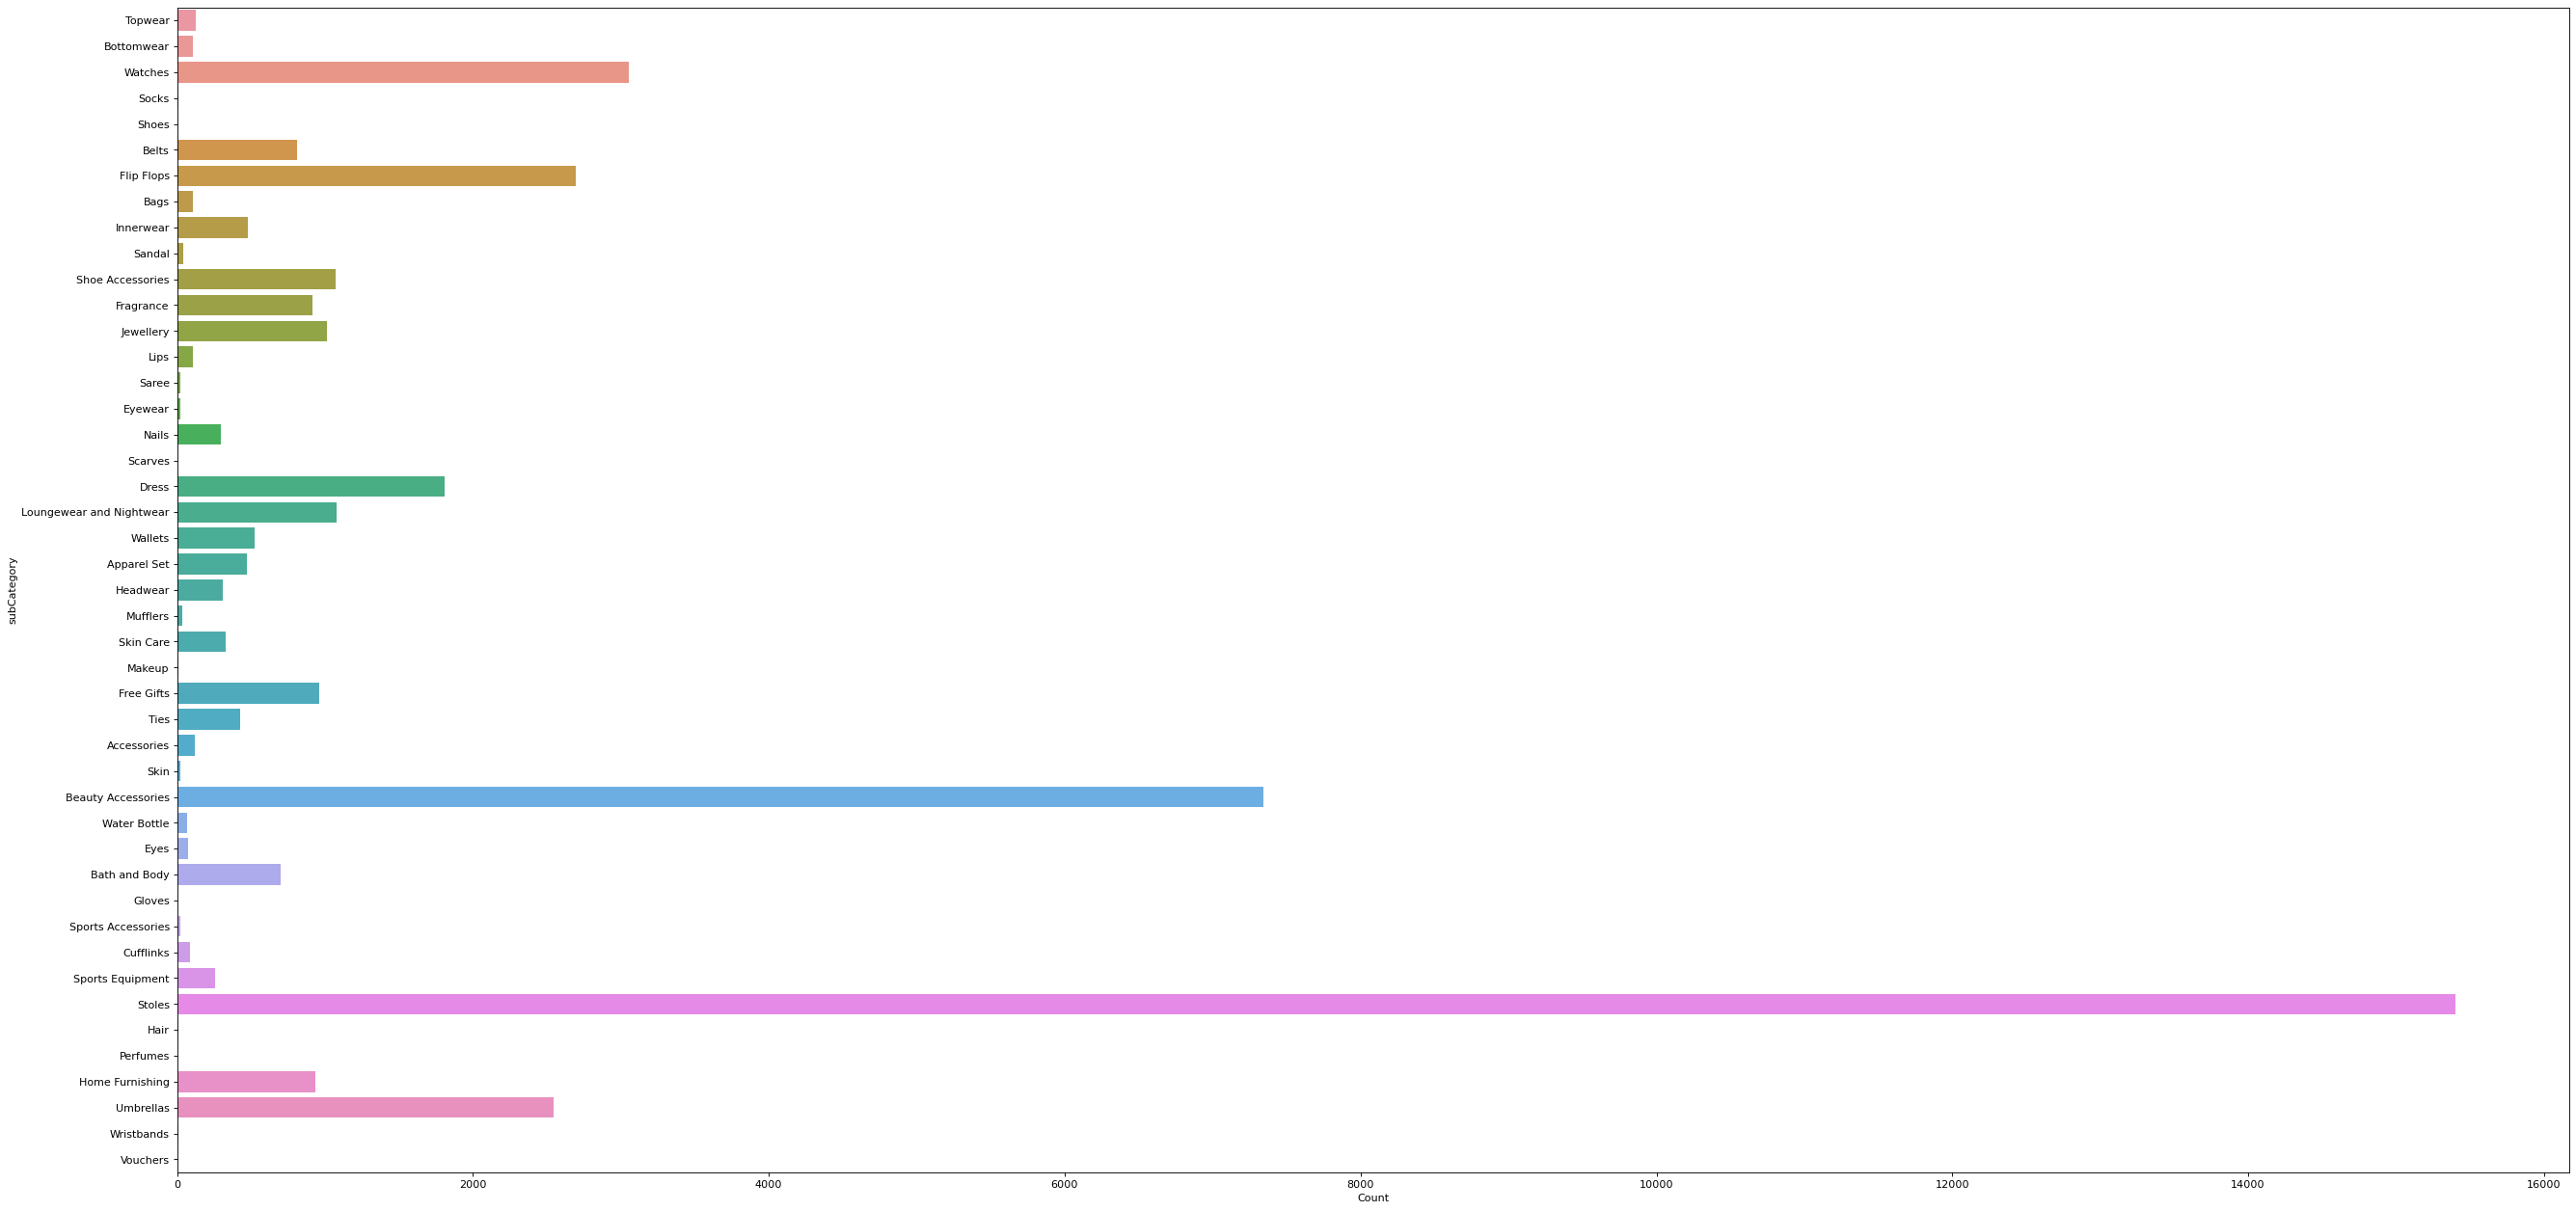

In [19]:
count_df = pd.DataFrame(columns=['subCategory', 'Count'])
count_df['subCategory'] = data['subCategory'].unique()
count_df['Count'] = data.groupby('subCategory').count().reset_index()['id']



plt.figure(num=None, figsize=(40,20), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(x="Count", y = 'subCategory' , data = count_df, orient="h")
plt.show()

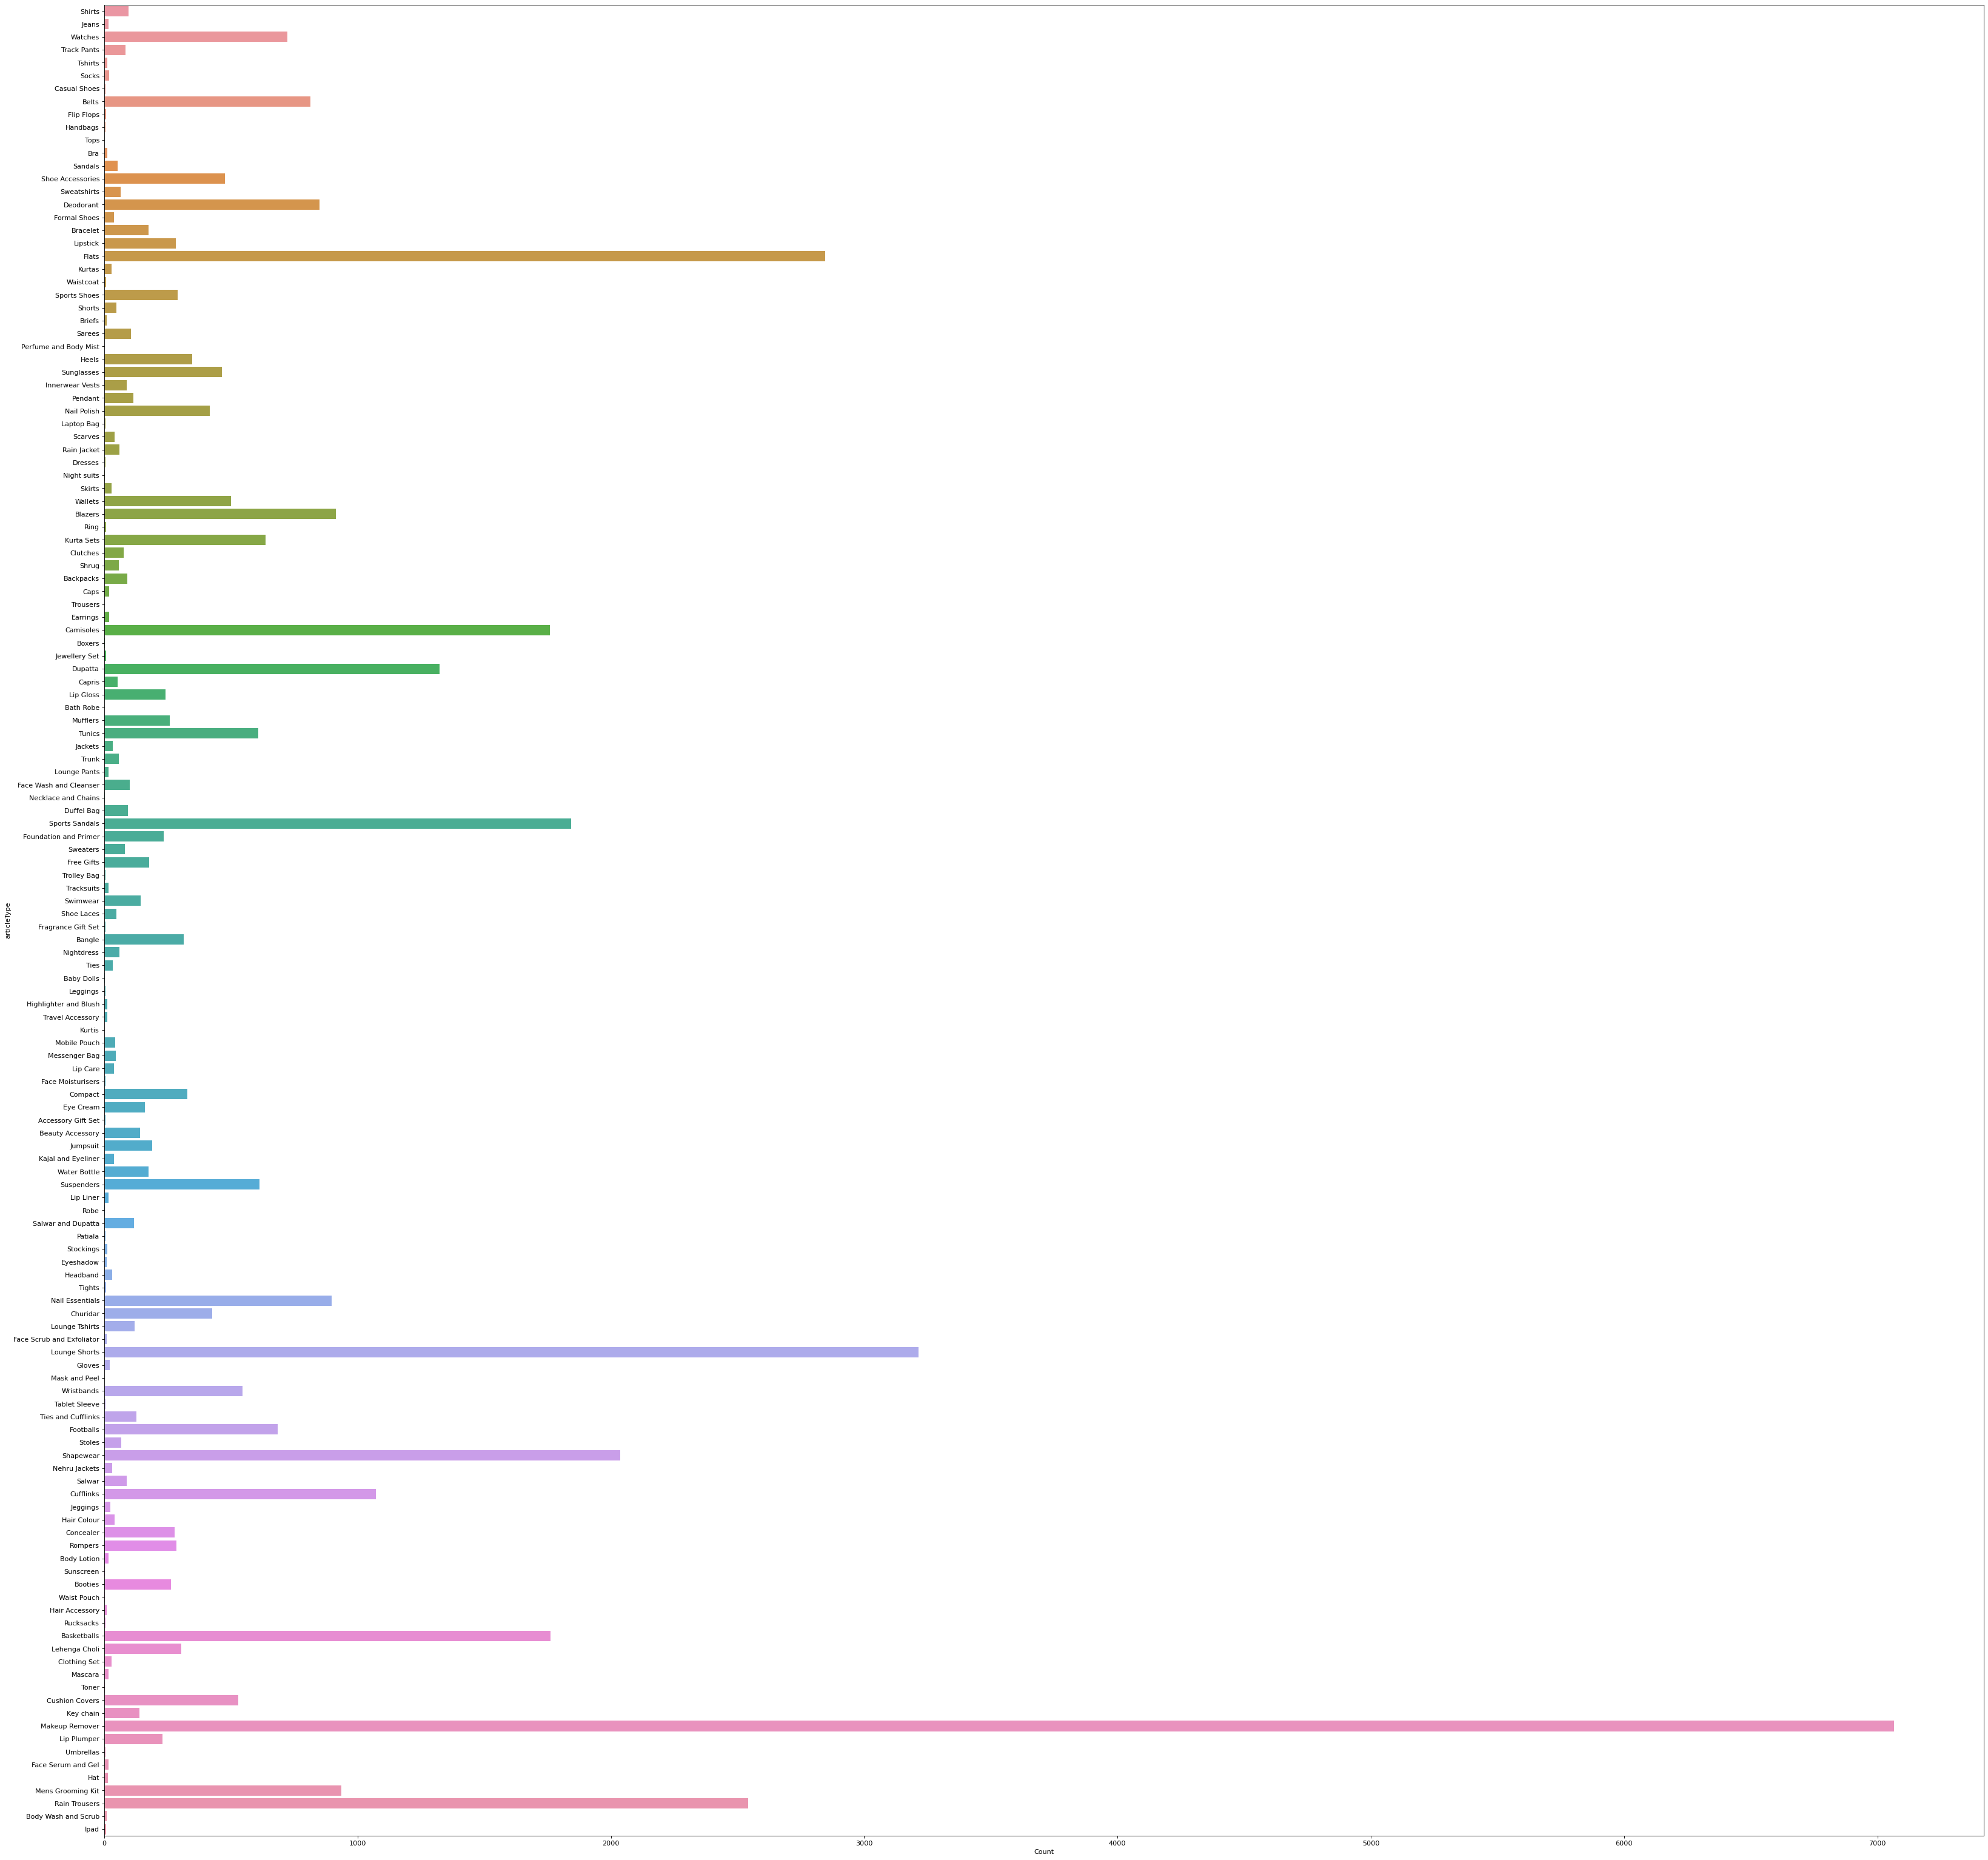

In [18]:
count_df = pd.DataFrame(columns=['articleType', 'Count'])
count_df['articleType'] = data['articleType'].unique()
count_df['Count'] = data.groupby('articleType').count().reset_index()['id']


figure = plt.figure(num=None, figsize=(50,50), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(x="Count", y = 'articleType' , data = count_df, orient="h")
plt.show()

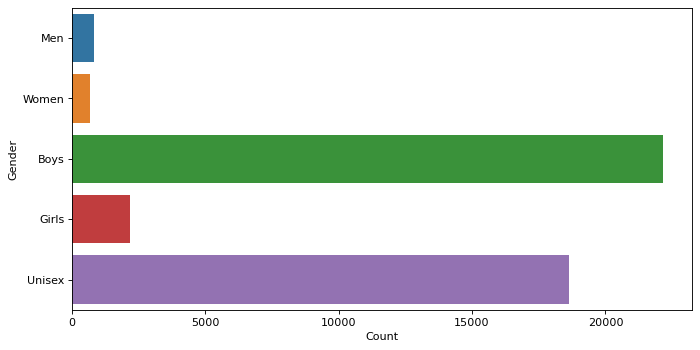

In [20]:
count_df = pd.DataFrame(columns=['Gender', 'Count'])
count_df['Gender'] = data['gender'].unique()
count_df['Count'] = data.groupby('gender').count().reset_index()['id']



plt.figure(num=None, figsize=(10,5), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(x="Count", y = 'Gender' , data = count_df, orient="h")
plt.show()

### Getting Image Size of all the Images without loading images into the memory


In [50]:
# !pip install imagesize
import imagesize
from tqdm.notebook import tqdm

aspect_dct = {}

start = time.time()
for img in tqdm(data.iterrows()):
    aspect_dct[img[1]['id']] = imagesize.get(img[1]['filename'])
    
aspect_df = pd.DataFrame.from_dict([aspect_dct]).T.reset_index()
aspect_df.set_axis(['FileName', 'Size'], axis = 'columns', inplace=True)
aspect_df[['Width', 'Height']] = pd.DataFrame(aspect_df["Size"].tolist(), index = aspect_df.index)
aspect_df['aspect_ratio'] = round(aspect_df['Width']/aspect_df['Height'],2)

end = time.time()

print("Time Taken for Image Size Dataset Creation: ")
print(end - start)


0it [00:00, ?it/s]

Time Taken for Image Size Dataset Creation: 
41.949249505996704


In [54]:
aspect_df

,FileName,Size,Width,Height,aspect_ratio
0,15970,"(1800, 2400)",1800,2400,0.75
1,39386,"(1800, 2400)",1800,2400,0.75
2,59263,"(1080, 1440)",1080,1440,0.75
3,21379,"(1800, 2400)",1800,2400,0.75
4,53759,"(1080, 1440)",1080,1440,0.75
...,...,...,...,...,...
44414,17036,"(1800, 2400)",1800,2400,0.75
44415,6461,"(1800, 2400)",1800,2400,0.75
44416,18842,"(1800, 2400)",1800,2400,0.75
44417,46694,"(1080, 1440)",1080,1440,0.75


### Different Image Sizes and their counts

In [51]:
print("Sizes (W,H) and Number of Images")
aspect_df['Size'].value_counts().nlargest(5)

Sizes (W,H) and Number of Images


(1080, 1440)    24440
(1800, 2400)    19718
(150, 200)        119
(360, 480)         60
(540, 720)         21
Name: Size, dtype: int64

### Counts of Aspect Ratios of Images

In [52]:
aspect_df['aspect_ratio'].value_counts().nlargest(10)

0.75    44397
0.67       10
1.00        5
0.66        2
0.78        2
0.80        1
0.79        1
0.76        1
Name: aspect_ratio, dtype: int64